# Bike store Sales Exploratory Analysis

This is a Sales analysis of Bike store selling Bikes and related accessories. This is my first Data Analysis project and am going to implement basic analysis techniques and visualizations to infer some insights from the data. I learned Exploratory data analysis from very Informative course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and I have learned very useful Python libraries such as NumPy, Pandas for data manipulation and cleaning and Matplotlib and Seaborn for data visualization.

## Downloading the Dataset

Used Dataset is the sales data of Bike Store which contain details of products sold and some customer details.

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [5]:

dataset_url = 'https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe' 

In [6]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: poojanjk1601
Your Kaggle Key: ········


100%|██████████| 1.15M/1.15M [00:00<00:00, 79.3MB/s]

The dataset has been downloaded and extracted.

In [7]:

data_dir = './bike-sales-in-europe'

In [8]:
import os
os.listdir(data_dir)

['Sales.csv']

Let us save and upload our work to Jovian before continuing.

In [9]:
project_name = "bike-stores-sales" # change this (use lowercase letters and hyphens only)

In [10]:
!pip install jovian --upgrade -q

In [11]:
import jovian

In [12]:
jovian.commit(project='bike-stores-sales')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kalariyapoojan/bike-stores-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kalariyapoojan/bike-stores-sales


'https://jovian.ai/kalariyapoojan/bike-stores-sales'

## Data Preparation and Cleaning

In this step, we will load the data into Pandas dataframe and explore number of rows, columns and values in dataset.
Further we would handle missing values or Invalid values.

In [13]:
#Importing Necessary librares
import pandas as pd
import numpy as np

In [14]:
#loading datasets
sales_df = pd.read_csv('./bike-sales-in-europe/Sales.csv')
sales_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [15]:
type(sales_df)

pandas.core.frame.DataFrame

In [16]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [18]:
sales_df.shape

(113036, 18)

In [19]:
sales_df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [50]:
sales_df['Profit_per_unit'] = sales_df['Unit_Price']-sales_df['Unit_Cost']
sales_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_per_unit
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,75
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,75
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,75
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,75
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,40
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,40
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,40
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,40


In [59]:
sales_df['Profit'] = sales_df['Order_Quantity']*sales_df['Profit_per_unit']
sales_df['Cost'] = sales_df['Order_Quantity']*sales_df['Unit_Cost']
sales_df['Revenue'] = sales_df['Order_Quantity']*sales_df['Unit_Price']
sales_df = sales_df.drop(['State'], axis=1)
sales_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_per_unit
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,75
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,75
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1725,1035,2760,75
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1500,900,2400,75
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,300,180,480,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,Clothing,Vests,"Classic Vest, S",3,24,64,120,72,192,40
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Clothing,Vests,"Classic Vest, M",22,24,64,880,528,1408,40
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Clothing,Vests,"Classic Vest, M",22,24,64,880,528,1408,40
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Clothing,Vests,"Classic Vest, L",24,24,64,960,576,1536,40


In [60]:

sales_df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_per_unit
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,372.681358,469.318695,842.000053,185.642061
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,595.080571,884.866118,1466.202934,375.093719
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,39.000000,28.000000,70.000000,3.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,135.000000,108.000000,245.000000,14.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,432.000000,432.000000,880.000000,44.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,26158.000000,42978.000000,69136.000000,1488.000000


In [61]:
sales_df['Age_Group'].unique()

array(['Youth (<25)', 'Adults (35-64)', 'Young Adults (25-34)',
       'Seniors (64+)'], dtype=object)

In [62]:
sales_df['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [63]:
sales_df['Country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [64]:
sales_df.shape

(113036, 18)

In [66]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kalariyapoojan/bike-stores-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kalariyapoojan/bike-stores-sales


'https://jovian.ai/kalariyapoojan/bike-stores-sales'

## Exploratory Analysis and Visualization

In this module we derive some basic Informations about our Data and try to find some trends and understand them by using some visuals like graphs.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [67]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Comparing Customers based on their Gender

In [68]:
sales_df['Customer_Gender'].value_counts()


M    58312
F    54724
Name: Customer_Gender, dtype: int64

Text(0.5, 0, 'Gender')

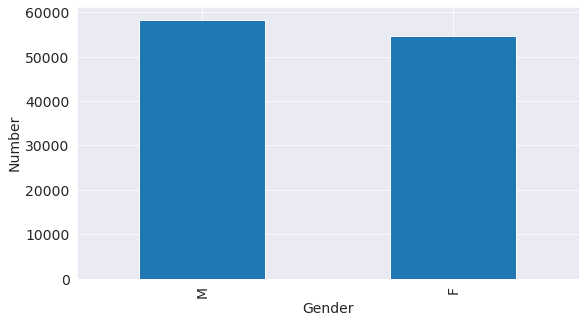

In [69]:
sales_df['Customer_Gender'].value_counts().plot(kind='bar')
sales_df['Customer_Gender'].value_counts().plot(kind='bar').set_ylabel('Number')
sales_df['Customer_Gender'].value_counts().plot(kind='bar').set_xlabel('Gender')

Here from the figures we can conclude that the ratio of Male customer to Female customer is slightly High

### Exploring Customers Based on their Age Groups

In [70]:
sales_df['Age_Group'].value_counts()


Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

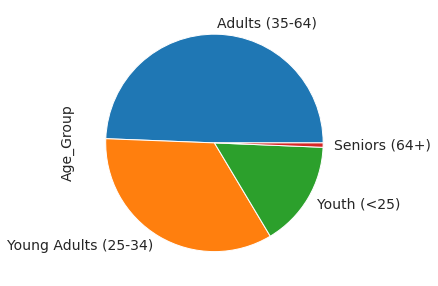

In [71]:
sales_df['Age_Group'].value_counts().plot(kind='pie')

Here this Pie chart shows the ration of customers based on their age groups, where Adults(35-64) age group acquires almost 50% Share.

### Figuring out Average Profit per transaction.

In [72]:
sales_df['Profit'].mean()

372.6813581513854

Here the figures show the average profit per transaction

### Finding Product with Maximum Profit

<AxesSubplot:xlabel='Sub_Category'>

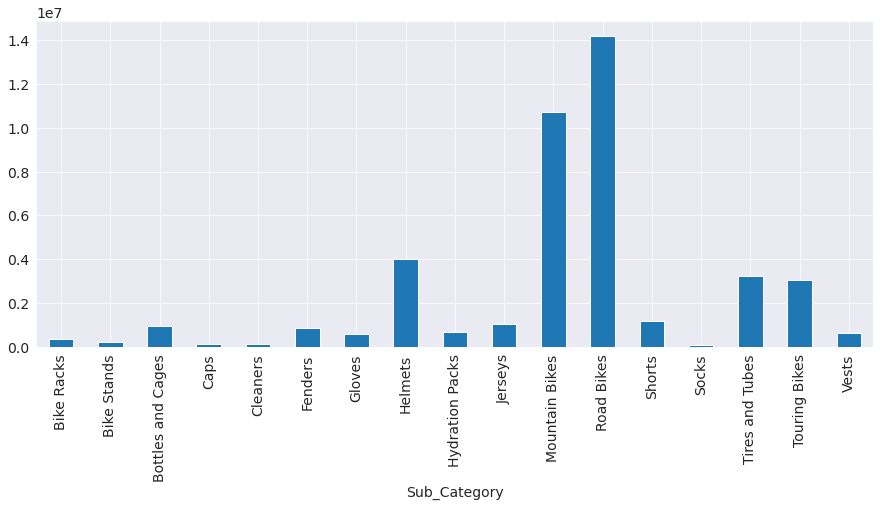

In [104]:
profit_by_product = sales_df.groupby(['Sub_Category'])['Profit'].sum()
profit_by_product.plot(kind='bar',figsize=(15,6))
#profit_by_product.plot(kind='bar',figsize=(30,6)).y_lable('Profit')

<AxesSubplot:xlabel='Product'>

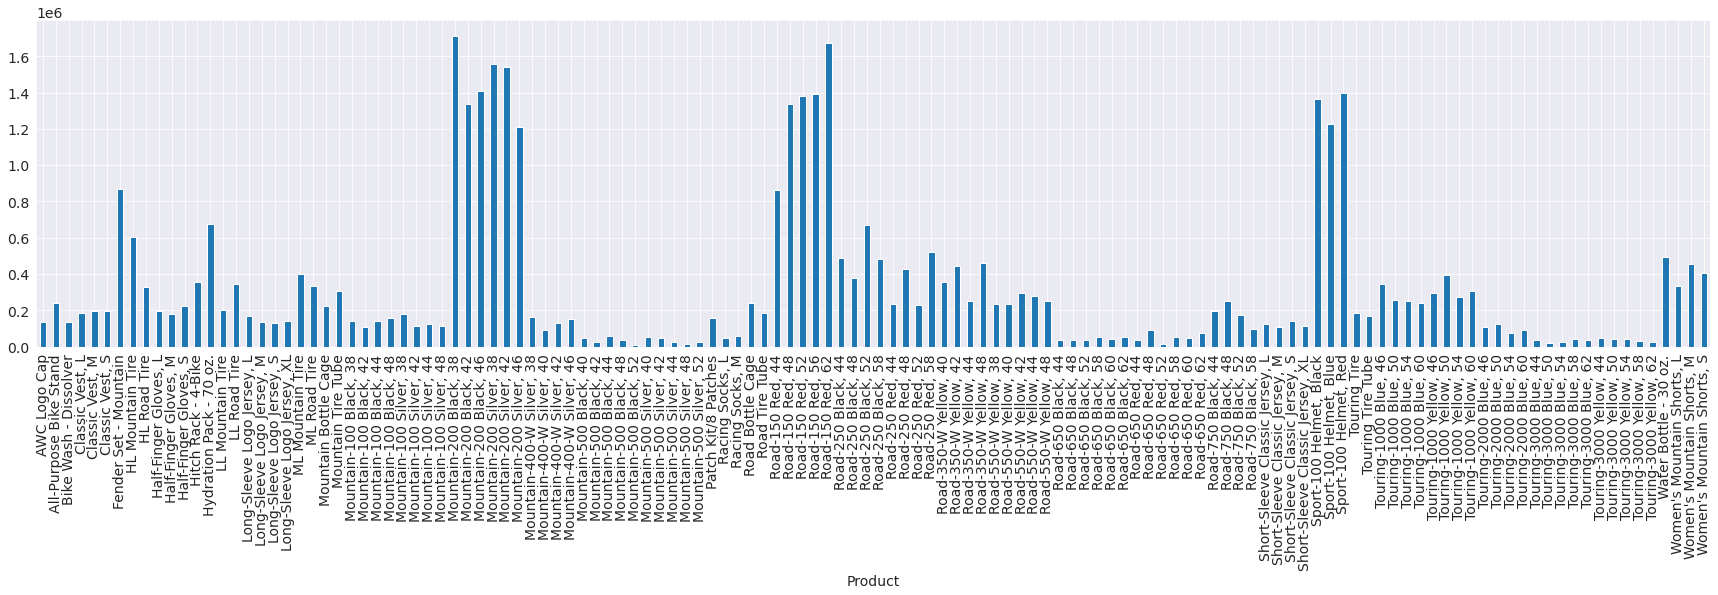

In [78]:
profit_by_product = sales_df.groupby(['Product'])['Profit'].sum()
profit_by_product.plot(kind='bar',figsize=(30,6))
#profit_by_product.plot(kind='bar',figsize=(30,6)).y_lable('Profit')

Above graph shows the comparison of profit earned by selling products. 

Let us save and upload our work to Jovian before continuing

In [79]:
import jovian

In [80]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kalariyapoojan/bike-stores-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kalariyapoojan/bike-stores-sales


'https://jovian.ai/kalariyapoojan/bike-stores-sales'

## Asking and Answering Questions

Here we are answering few Questions which can be useful while taking future business decisions.



#### Q1: Which is a country Contributing to maximum profits ?

<AxesSubplot:xlabel='Country'>

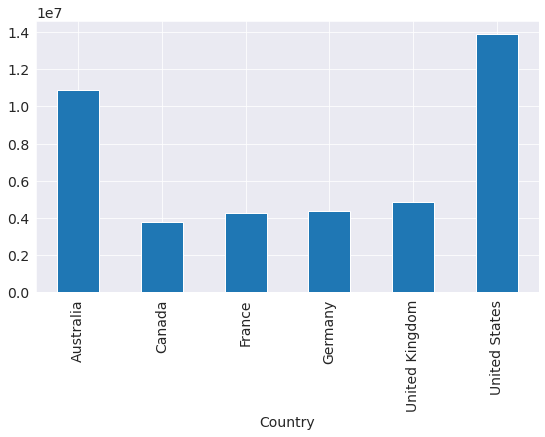

In [83]:
sales_df.groupby(['Country'])['Profit'].sum().plot(kind = 'bar')

Here It become clear from the above graph that United States contribute Maximum to the profits.

#### Q2:Which Year did the Store observed maximum sales ?

<AxesSubplot:xlabel='Year'>

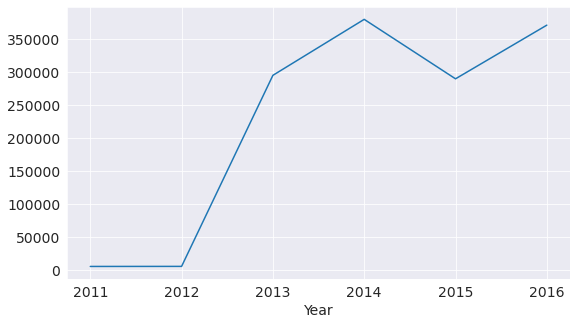

In [93]:
sales_df.groupby(['Year'])['Order_Quantity'].sum().plot(kind='line')

Here it can be observed that sales were at top in 2014 which dropped in 2015 and again gained nearly same Quantity in 2016

#### Q3: Which was the most soled product in year 2015 ?

In [94]:
_2015_df = sales_df[sales_df['Year'] == 2015]
_2015_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_per_unit
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,75
11,2015-07-30,30,July,2015,32,Young Adults (25-34),F,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,75
13,2015-07-15,15,July,2015,34,Young Adults (25-34),M,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,525,315,840,75
15,2015-08-02,2,August,2015,29,Young Adults (25-34),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,525,315,840,75
17,2015-09-02,2,September,2015,29,Young Adults (25-34),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,75,45,120,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113015,2015-12-10,10,December,2015,20,Youth (<25),F,United States,Clothing,Vests,"Classic Vest, M",6,24,64,240,144,384,40
113017,2015-10-04,4,October,2015,20,Youth (<25),M,United States,Clothing,Vests,"Classic Vest, L",18,24,64,720,432,1152,40
113021,2015-10-02,2,October,2015,34,Young Adults (25-34),M,United States,Clothing,Vests,"Classic Vest, S",24,24,64,960,576,1536,40
113027,2015-07-08,8,July,2015,29,Young Adults (25-34),M,Germany,Clothing,Vests,"Classic Vest, L",21,24,64,840,504,1344,40


In [102]:
_2015_df.groupby(['Sub_Category'])['Order_Quantity'].sum()

Sub_Category
Bike Racks             1000
Bike Stands             622
Bottles and Cages     49350
Caps                  13916
Cleaners               5766
Fenders               13802
Gloves                 8499
Helmets               39498
Hydration Packs        4647
Jerseys               19909
Mountain Bikes         3124
Road Bikes             4202
Shorts                 6786
Socks                  3729
Tires and Tubes      110155
Touring Bikes          1230
Vests                  3282
Name: Order_Quantity, dtype: int64

Here it can be seen that Tires and Tubes are the most sold product by Bike Store in Year 2015

#### Q4: What was the Turnover of Store in year 2016 ?

In [105]:
_2016_df = sales_df[sales_df['Year'] == 2016]
_2016_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_per_unit
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1500,900,2400,75
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,375,225,600,75
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,150,90,240,75
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1575,945,2520,75
19,2016-01-22,22,January,2016,29,Young Adults (25-34),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,75,45,120,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113023,2016-03-20,20,March,2016,34,Young Adults (25-34),M,United States,Clothing,Vests,"Classic Vest, S",26,24,64,1040,624,1664,40
113025,2016-04-03,3,April,2016,34,Young Adults (25-34),M,United States,Clothing,Vests,"Classic Vest, S",14,24,64,560,336,896,40
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,Clothing,Vests,"Classic Vest, S",3,24,64,120,72,192,40
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Clothing,Vests,"Classic Vest, M",22,24,64,880,528,1408,40


In [106]:
_2016_df['Revenue'].sum()

19681769

The total Turnover of Bike store in year 2016 was 19681769.

#### Q5: Maximum sales of Bikes was observed in which Month in year 2015 ?

In [108]:
_2015_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_per_unit
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,75
11,2015-07-30,30,July,2015,32,Young Adults (25-34),F,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,600,360,960,75
13,2015-07-15,15,July,2015,34,Young Adults (25-34),M,Australia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,525,315,840,75
15,2015-08-02,2,August,2015,29,Young Adults (25-34),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,525,315,840,75
17,2015-09-02,2,September,2015,29,Young Adults (25-34),M,Canada,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,75,45,120,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113015,2015-12-10,10,December,2015,20,Youth (<25),F,United States,Clothing,Vests,"Classic Vest, M",6,24,64,240,144,384,40
113017,2015-10-04,4,October,2015,20,Youth (<25),M,United States,Clothing,Vests,"Classic Vest, L",18,24,64,720,432,1152,40
113021,2015-10-02,2,October,2015,34,Young Adults (25-34),M,United States,Clothing,Vests,"Classic Vest, S",24,24,64,960,576,1536,40
113027,2015-07-08,8,July,2015,29,Young Adults (25-34),M,Germany,Clothing,Vests,"Classic Vest, L",21,24,64,840,504,1344,40


In [111]:
_2015_bikes_df = _2015_df[_2015_df['Product_Category'] == 'Bikes']
_2015_bikes_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_per_unit
49305,2015-01-28,28,January,2015,31,Young Adults (25-34),M,Australia,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,1488,1912,3400,1488
49307,2015-07-22,22,July,2015,31,Young Adults (25-34),M,Australia,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",2,1912,3400,2976,3824,6800,1488
49309,2015-12-25,25,December,2015,31,Young Adults (25-34),M,Australia,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",3,1912,3400,4464,5736,10200,1488
49313,2015-07-04,4,July,2015,32,Young Adults (25-34),M,Australia,Bikes,Mountain Bikes,"Mountain-100 Silver, 44",1,1912,3400,1488,1912,3400,1488
49315,2015-02-07,7,February,2015,32,Young Adults (25-34),M,Australia,Bikes,Mountain Bikes,"Mountain-100 Black, 48",3,1898,3375,4431,5694,10125,1477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112041,2015-12-29,29,December,2015,21,Youth (<25),F,United Kingdom,Bikes,Touring Bikes,"Touring-2000 Blue, 54",1,755,1215,460,755,1215,460
112043,2015-07-04,4,July,2015,22,Youth (<25),M,United Kingdom,Bikes,Touring Bikes,"Touring-2000 Blue, 46",1,755,1215,460,755,1215,460
112045,2015-10-07,7,October,2015,22,Youth (<25),M,United Kingdom,Bikes,Touring Bikes,"Touring-2000 Blue, 46",2,755,1215,920,1510,2430,460
112047,2015-10-18,18,October,2015,22,Youth (<25),M,United Kingdom,Bikes,Touring Bikes,"Touring-2000 Blue, 46",1,755,1215,460,755,1215,460


<AxesSubplot:xlabel='Month'>

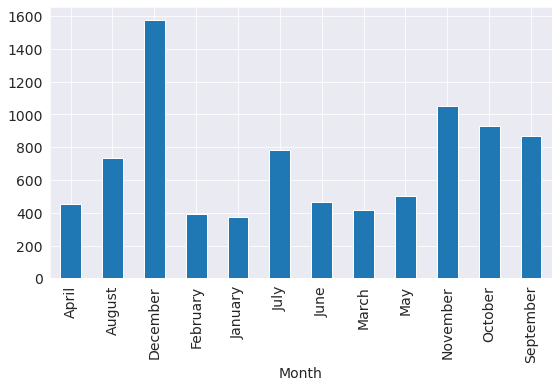

In [112]:
_2015_bikes_df.groupby(['Month'])['Order_Quantity'].sum().plot(kind = 'bar')

Here the graph shows that in 2015 maximum Bikes were Sold in December Month. 

Let us save and upload our work to Jovian before continuing.

In [113]:
import jovian

In [114]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kalariyapoojan/bike-stores-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kalariyapoojan/bike-stores-sales


'https://jovian.ai/kalariyapoojan/bike-stores-sales'

## Inferences and Conclusion

Here from the given data we can conclude few things, First one among them is Stores Observed a Sharp Hike from Year 2012 to 2013, Second one is the most sold Product by the Stores is Tires and Tubes, while most Profitable Product is Mountain Bike.
Further we can observe that Stores have Maximum Sales in United States of America followed by Australia compared to other countries.

In [115]:
import jovian

In [116]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kalariyapoojan/bike-stores-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kalariyapoojan/bike-stores-sales


'https://jovian.ai/kalariyapoojan/bike-stores-sales'

## References and Future Work

This is a huge dataset where one can derive various Inferences and I would suggest to find out things such as Which type of Product is Consumed by the customers based on their Gender, Country etc..

In [117]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>